In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [10]:
train_data = pd.read_csv("../dataset/ant_train.csv")
test_data = pd.read_csv("../dataset/ant_test.csv")

train_data

,F72,F25,F65,F68,F101,F104,F105,F15-private,F15-protected,F15-public,...,F71-sbailliez@apache.org,F71-ehatcher@apache.org,F71-costin@apache.org,F71-rubys@apache.org,F71-peterreilly@apache.org,F71-hibou@apache.org,F71-conor@apache.org,F71-mbenson@apache.org,F71-jhm@apache.org,label
0,0.794814,0.856370,0.480,0.372796,0.060358,0.233491,1.000000,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1
1,0.794814,0.856370,0.480,0.372796,0.170772,0.233491,0.829676,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,0.794814,0.856370,0.480,0.372796,0.081054,0.233491,0.622853,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0
3,0.794814,0.856370,0.480,0.372796,0.017716,0.233491,0.710719,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0
4,0.794814,0.856370,0.480,0.372796,0.129722,0.233491,0.210314,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,0.900085,0.906651,0.048,0.120907,0.134318,0.190212,0.907096,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
1225,0.062961,0.261418,0.096,0.120907,0.134318,0.188549,0.872257,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1226,0.000000,0.000000,0.008,0.040302,0.138179,0.746555,1.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1227,0.637839,0.834936,0.016,0.040302,0.138026,0.350547,1.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0


In [11]:
feature_columns = ['F72', 'F25', 'F65', 'F68', 'F101', 'F104', 'F105', 'F15-private',
       'F15-protected', 'F15-public', 'F22', 'F123', 'F77', 'F41', 'F126', 'F71-kevj@apache.org', 'F71-jskeet@apache.org',
       'F71-donaldp@apache.org', 'F71-antoine@apache.org',
       'F71-jkf@apache.org', 'F71-stevel@apache.org', 'F71-jglick@apache.org',
       'F71-bodewig@apache.org', 'F71-stefano@apache.org',
       'F71-umagesh@apache.org', 'F71-sbailliez@apache.org',
       'F71-ehatcher@apache.org', 'F71-costin@apache.org',
       'F71-rubys@apache.org', 'F71-peterreilly@apache.org',
       'F71-hibou@apache.org', 'F71-conor@apache.org',
       'F71-mbenson@apache.org', 'F71-jhm@apache.org']

X_train = train_data[feature_columns]
y_train = train_data['label']

X_test = test_data[feature_columns]
y_test = test_data['label']

In [12]:
# Logistic Regression Model

logistic_model = LogisticRegression()

# Define hyperparameters to tune
param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}

# GridSearchCV for hyperparameter tuning
grid_search_logistic = GridSearchCV(logistic_model, param_grid, cv=5, scoring='f1')

# Fit the model
grid_search_logistic.fit(X_train, y_train)

# Best parameters
print("Best parameters for Logistic Regression: ", grid_search_logistic.best_params_)


Best parameters for Logistic Regression:  {'C': 10, 'solver': 'lbfgs'}


In [13]:
# Predict on the test data
y_pred_logistic = grid_search_logistic.predict(X_test)
y_proba_logistic = grid_search_logistic.predict_proba(X_test)[:, 1]

# Evaluation Metrics for Logistic Regression
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Precision:", precision_score(y_test, y_pred_logistic))
print("Recall:", recall_score(y_test, y_pred_logistic))
print("F1 Score:", f1_score(y_test, y_pred_logistic))
print("AUC Score:", roc_auc_score(y_test, y_proba_logistic))

Logistic Regression Metrics:
Accuracy: 0.8304932735426009
Precision: 0.10526315789473684
Recall: 0.3333333333333333
F1 Score: 0.16
AUC Score: 0.646332949348972


In [14]:
# Support Vector Machine Model

svm_model = SVC(probability=True)

param_grid_svm = {
    'C': [0.1, 1],
    'kernel': ['linear','rbf']
}

grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='f1')

grid_search_svm.fit(X_train, y_train)

print("Best parameters for SVM:", grid_search_svm.best_params_)

Best parameters for SVM: {'C': 1, 'kernel': 'rbf'}


In [15]:
y_pred_svm = grid_search_svm.predict(X_test)
y_proba_svm = grid_search_svm.predict_proba(X_test)[:, 1]

print("SVM Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("AUC Score:", roc_auc_score(y_test, y_proba_svm))

SVM Metrics:
Accuracy: 0.9506726457399103
Precision: 0.46153846153846156
Recall: 0.1111111111111111
F1 Score: 0.1791044776119403
AUC Score: 0.7517279296261389


In [16]:
# Random Forest Model

rf_model = RandomForestClassifier()

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='f1')

grid_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)

Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


In [17]:
y_pred_rf = grid_search_rf.predict(X_test)
y_proba_rf = grid_search_rf.predict_proba(X_test)[:, 1]

print("Random Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("AUC Score:", roc_auc_score(y_test, y_proba_rf))


Random Forest Metrics:
Accuracy: 0.9228699551569507
Precision: 0.25
Recall: 0.2962962962962963
F1 Score: 0.2711864406779661
AUC Score: 0.8649596816420568


In [18]:
# Compare the models
models = ['Logistic Regression', 'SVM', 'Random Forest']
accuracies = [
    accuracy_score(y_test, y_pred_logistic),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_rf)
]
precisions = [
    precision_score(y_test, y_pred_logistic),
    precision_score(y_test, y_pred_svm),
    precision_score(y_test, y_pred_rf)
]
recalls = [
    recall_score(y_test, y_pred_logistic),
    recall_score(y_test, y_pred_svm),
    recall_score(y_test, y_pred_rf)
]
f1_scores = [
    f1_score(y_test, y_pred_logistic),
    f1_score(y_test, y_pred_svm),
    f1_score(y_test, y_pred_rf)
]
auc_scores = [
    roc_auc_score(y_test, y_proba_logistic),
    roc_auc_score(y_test, y_proba_svm),
    roc_auc_score(y_test, y_proba_rf)
]

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores,
    'AUC Score': auc_scores
})

results_df


,Model,Accuracy,Precision,Recall,F1 Score,AUC Score
0,Logistic Regression,0.830493,0.105263,0.333333,0.160000,0.646333
1,SVM,0.950673,0.461538,0.111111,0.179104,0.751728
2,Random Forest,0.922870,0.250000,0.296296,0.271186,0.864960


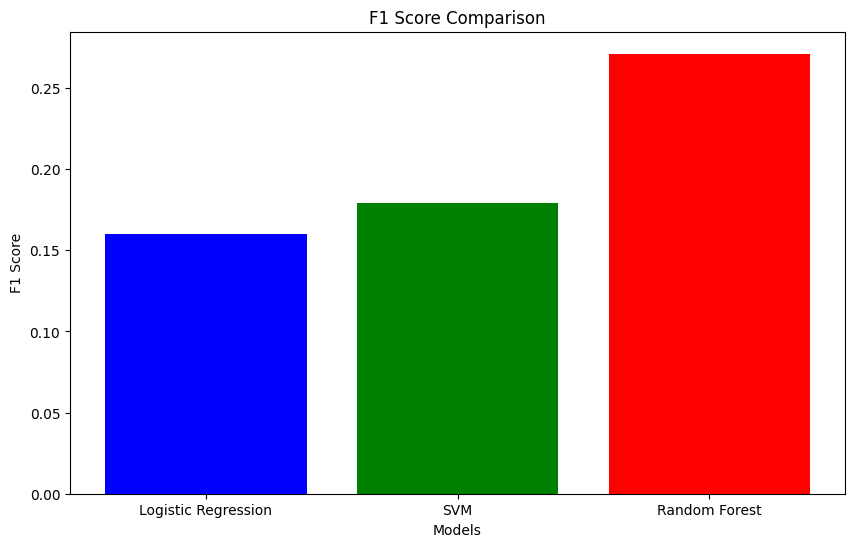

In [19]:
# Plotting the F1 Score comparison
plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color=['blue', 'green', 'red'])
plt.title('F1 Score Comparison')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.show()

In [20]:
from sklearn.ensemble import VotingClassifier

base_models = [
    ('logistic', grid_search_logistic.best_estimator_),
    ('svm', grid_search_svm.best_estimator_),
    ('rf', grid_search_rf.best_estimator_)
]

# Hard Voting Classifier (majority voting)
hard_voting_clf = VotingClassifier(estimators=base_models, voting='hard')
hard_voting_clf.fit(X_train, y_train)

# Predict using hard voting (class predictions)
y_pred_hard_voting = hard_voting_clf.predict(X_test)

# Metrics for Hard Voting 
print("Hard Voting Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_hard_voting))
print("Precision:", precision_score(y_test, y_pred_hard_voting))
print("Recall:", recall_score(y_test, y_pred_hard_voting))
print("F1 Score:", f1_score(y_test, y_pred_hard_voting))
print("AUC Score: Not available for hard voting\n")

# Soft Voting Classifier (average probabilities)
soft_voting_clf = VotingClassifier(estimators=base_models, voting='soft')
soft_voting_clf.fit(X_train, y_train)

# Predict and evaluate soft voting (probabilities are available)
y_pred_soft_voting = soft_voting_clf.predict(X_test)
y_proba_soft_voting = soft_voting_clf.predict_proba(X_test)[:, 1]

print("Soft Voting Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_soft_voting))
print("Precision:", precision_score(y_test, y_pred_soft_voting))
print("Recall:", recall_score(y_test, y_pred_soft_voting))
print("F1 Score:", f1_score(y_test, y_pred_soft_voting))
print("AUC Score:", roc_auc_score(y_test, y_proba_soft_voting))


Hard Voting Classifier Metrics:
Accuracy: 0.947085201793722
Precision: 0.4074074074074074
Recall: 0.2037037037037037
F1 Score: 0.2716049382716049
AUC Score: Not available for hard voting

Soft Voting Classifier Metrics:
Accuracy: 0.9076233183856502
Precision: 0.17333333333333334
Recall: 0.24074074074074073
F1 Score: 0.20155038759689922
AUC Score: 0.766031347086955
